# Analysis of Genres Vs. Box Office and Profitability

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sets the display of float variables so they are not in
# scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# entering color palet for visuals
MIC_OR = '#F25022'
MIC_GR = '#7FBA00'
MIC_BL = '#00A4EF'
MIC_YL = '#FFB900'
MIC_GY = '#737373'

microsoft_color_list = [MIC_OR, MIC_GR, MIC_BL, MIC_YL, MIC_GY]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=microsoft_color_list)

In [3]:
!ls

RT.ipynb
all_data_copy.ipynb
all_data_preparation.ipynb
budget_v_profit.ipynb
data_preparation.ipynb
genre_v_boxoffice.ipynb
genre_v_budget.ipynb
imdb_first_look.ipynb
talent_v_revenue.ipynb
the_movies_db_api.ipynb


In [4]:
# load in the datasets
df_all_data = pd.read_csv('../data/all_data.csv', index_col=0)
df_movie_info = pd.read_csv('../data/movie_info_budget.csv', index_col=0)

### Now it's time to take a look at both data frames

In [5]:
print(df_all_data.shape)
df_all_data.head(10)

(34033, 23)


,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,production_budget,domestic_gross,worldwide_gross,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
5,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00
6,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Tim Burton,director,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
7,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Tim Burton,director,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
8,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Tim Burton,director,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00
9,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Anne Hathaway,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00


In [6]:
print(df_movie_info.shape)
df_movie_info.head(10)

(12689, 16)


,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Tim Burton,director,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Anne Hathaway,actress,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Joe Roth,producer,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
5,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Lewis Carroll,writer,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
6,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Jennifer Todd,producer,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
7,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Suzanne Todd,producer,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
8,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Linda Woolverton,writer,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
9,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Mia Wasikowska,actress,alice in wonderland 2010,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110


#### df_all_data will allow me to look at the individual genres and how they performed against box office and profitability

In [7]:
# take a look at the columns
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34033 entries, 0 to 34032
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_id               34033 non-null  object 
 1   primary_title          34033 non-null  object 
 2   original_title         34033 non-null  object 
 3   start_year             34033 non-null  int64  
 4   genres                 34033 non-null  object 
 5   average_rating         34033 non-null  float64
 6   num_votes              34033 non-null  int64  
 7   persons_name           34033 non-null  object 
 8   persons_job            34033 non-null  object 
 9   title_norm_movie_info  34033 non-null  object 
 10  id                     34033 non-null  int64  
 11  release_date           34033 non-null  object 
 12  movie                  34033 non-null  object 
 13  production_budget      34033 non-null  int64  
 14  domestic_gross         34033 non-null  int64  
 15  wo

In [8]:
df_all_data['new_ww_revenue_api'].value_counts()

0.00            3326
158162788.00      60
432844677.00      60
3020664.00        60
14618727.00       60
                ... 
21164799.00        7
34522221.00        6
61700416.00        6
111300.00          4
7972967.00         4
Name: new_ww_revenue_api, Length: 1115, dtype: int64

In [9]:
df_all_data.loc[df_all_data['new_ww_revenue_api'] == 0]

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,production_budget,domestic_gross,worldwide_gross,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count
30,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,James Fotopoulos,director,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,0.00,0.00,tt2049386,6.50,2.00
31,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,James Fotopoulos,director,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Singing,0.00,0.00,tt2049386,6.50,2.00
32,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,Lauren Nicole Goode,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,0.00,0.00,tt2049386,6.50,2.00
33,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,Lauren Nicole Goode,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Singing,0.00,0.00,tt2049386,6.50,2.00
34,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,Nate Archer,composer,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,0.00,0.00,tt2049386,6.50,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Sebastian Stan,actor,destroyer 2018,...,9000000,1533324,3681096,destroyer 2018,Action,9000000.00,0.00,tt7137380,5.90,580.00
33912,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Sebastian Stan,actor,destroyer 2018,...,9000000,1533324,3681096,destroyer 2018,Drama,9000000.00,0.00,tt7137380,5.90,580.00
33913,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Fred Berger,producer,destroyer 2018,...,9000000,1533324,3681096,destroyer 2018,Crime,9000000.00,0.00,tt7137380,5.90,580.00
33914,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Fred Berger,producer,destroyer 2018,...,9000000,1533324,3681096,destroyer 2018,Action,9000000.00,0.00,tt7137380,5.90,580.00


In [10]:
df_all_data['worldwide_gross'].value_counts()

0            1313
14618727       60
81831866       60
652127828      60
532938302      60
             ... 
433588          6
1109276         4
9082906         4
6653715         3
8374            1
Name: worldwide_gross, Length: 1213, dtype: int64

#### Important to note that the new_ww_revenue_api has the latest numbers for worldwide revenue but there are more 0 values than the old worldwide_gross. So I will create a new column 'worldwide_gross_final' the will use the 'worldwide_gross' value if the 'new_ww_revenue_api' is equal to 0.

In [11]:
# creating new 'worldwide_gross_final' column
df_all_data['worldwide_gross_final'] = np.where(df_all_data['new_ww_revenue_api'] == 0,
                                               df_all_data['worldwide_gross'],
                                               df_all_data['new_ww_revenue_api'])

In [12]:
# check out the new column. it looks good
df_all_data

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,domestic_gross,worldwide_gross,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count,worldwide_gross_final
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34028,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Jacob Tremblay,actor,the predator 2018,...,51024708,159487563,the predator 2018,Adventure,88000000.00,160542134.00,tt3829266,5.60,3786.00,160542134.00
34029,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Jacob Tremblay,actor,the predator 2018,...,51024708,159487563,the predator 2018,Sci-Fi,88000000.00,160542134.00,tt3829266,5.60,3786.00,160542134.00
34030,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Trevante Rhodes,actor,the predator 2018,...,51024708,159487563,the predator 2018,Action,88000000.00,160542134.00,tt3829266,5.60,3786.00,160542134.00
34031,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Trevante Rhodes,actor,the predator 2018,...,51024708,159487563,the predator 2018,Adventure,88000000.00,160542134.00,tt3829266,5.60,3786.00,160542134.00


In [13]:
# taking a closer look at new column if it worked where
# there are 0s in ww_new_revenue_api
df_all_data.loc[df_all_data['new_ww_revenue_api'] == 0]

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,domestic_gross,worldwide_gross,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count,worldwide_gross_final
30,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,James Fotopoulos,director,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Fantasy,0.00,0.00,tt2049386,6.50,2.00,1025491110.00
31,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,James Fotopoulos,director,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Singing,0.00,0.00,tt2049386,6.50,2.00,1025491110.00
32,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,Lauren Nicole Goode,actress,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Fantasy,0.00,0.00,tt2049386,6.50,2.00,1025491110.00
33,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,Lauren Nicole Goode,actress,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Singing,0.00,0.00,tt2049386,6.50,2.00,1025491110.00
34,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,"Fantasy,Singing",6.50,6,Nate Archer,composer,alice in wonderland 2010,...,334191110,1025491110,alice in wonderland 2010,Fantasy,0.00,0.00,tt2049386,6.50,2.00,1025491110.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33911,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Sebastian Stan,actor,destroyer 2018,...,1533324,3681096,destroyer 2018,Action,9000000.00,0.00,tt7137380,5.90,580.00,3681096.00
33912,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Sebastian Stan,actor,destroyer 2018,...,1533324,3681096,destroyer 2018,Drama,9000000.00,0.00,tt7137380,5.90,580.00,3681096.00
33913,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Fred Berger,producer,destroyer 2018,...,1533324,3681096,destroyer 2018,Crime,9000000.00,0.00,tt7137380,5.90,580.00,3681096.00
33914,tt7137380,Destroyer,Destroyer,2018,"Action,Crime,Drama",6.20,13683,Fred Berger,producer,destroyer 2018,...,1533324,3681096,destroyer 2018,Action,9000000.00,0.00,tt7137380,5.90,580.00,3681096.00


#### Now I'll do the same thing for the budgets of the movie

In [14]:
df_all_data['new_budget_api'].value_counts()

0.00           2297
40000000.00    1267
20000000.00    1199
30000000.00    1194
35000000.00    1149
               ... 
150000.00         9
1900000.00        8
5000.00           8
600000.00         8
225000.00         4
Name: new_budget_api, Length: 205, dtype: int64

In [15]:
df_all_data['production_budget'].value_counts()

20000000    1448
40000000    1307
10000000    1220
35000000    1110
30000000    1108
            ... 
42000          8
45000          7
2900000        7
400000         6
225000         4
Name: production_budget, Length: 228, dtype: int64

#### 'new_budget_api' has the updated budgets so if these are 0 I will replace them with the 'production_budget' value

I will create a new column 'budget_final'

In [16]:
# creating the final budget column
df_all_data['budget_final'] = np.where(df_all_data['new_budget_api'] == 0,
                                               df_all_data['production_budget'],
                                               df_all_data['new_budget_api'])

In [17]:
# taking a look at the new column
df_all_data[['movie_id', 'production_budget', 'new_budget_api', 'budget_final']]\
    .loc[df_all_data['new_budget_api'] == 0]

,movie_id,production_budget,new_budget_api,budget_final
30,tt2049386,200000000,0.00,200000000.00
31,tt2049386,200000000,0.00,200000000.00
32,tt2049386,200000000,0.00,200000000.00
33,tt2049386,200000000,0.00,200000000.00
34,tt2049386,200000000,0.00,200000000.00
...,...,...,...,...
33375,tt6182908,80000000,0.00,80000000.00
33376,tt6182908,80000000,0.00,80000000.00
33377,tt6182908,80000000,0.00,80000000.00
33378,tt6182908,80000000,0.00,80000000.00


#### I'll add a profitability column that will show the difference between worldwide gross and production budget.

NOTE: Microsoft is a large enough company where they may want to distribute large movies worldwide. This is why I'll gauge profitability based off (worldwide_gross_final - budget_final) rather than (domestic_gross - budget_final)

In [18]:
# add profitability column to df_all_data
df_all_data['profitability'] = df_all_data['worldwide_gross_final'] - df_all_data['budget_final']

In [19]:
# take a look at the new column
df_all_data.head()

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count,worldwide_gross_final,budget_final,profitability
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00,200000000.00,825467110.00
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00,200000000.00,825467110.00
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00,200000000.00,825467110.00
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00,200000000.00,825467110.00
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00,1025467110.00,200000000.00,825467110.00


#### We don't need the person's name, ratings, and etc.. Only columns we need are ['movie_id', 'genre', 'primary_title', 'budget_final', 'domestic_gross', 'worldwide_gross_final']

#### Now I need to group by the dataframe in order to get the genres and gross associated with the movie_id. Then from there I can do a final group by to find the average of each genre.

In [20]:
# we only need the relevant columns for our analysis
relevant_columns = ['movie_id', 
                    'genre', 
                    'primary_title', 
                    'budget_final', 
                    'domestic_gross', 
                    'worldwide_gross_final', 
                    'profitability']
df_all_filtered = df_all_data[relevant_columns].groupby(['movie_id','genre']).mean().reset_index()

In [21]:
df_all_filtered

,movie_id,genre,budget_final,domestic_gross,worldwide_gross_final,profitability
0,tt0249516,Action,65000000.00,0,73706.00,-64926294.00
1,tt0249516,Animation,65000000.00,0,73706.00,-64926294.00
2,tt0249516,Comedy,65000000.00,0,73706.00,-64926294.00
3,tt0359950,Adventure,90000000.00,58236838,188133322.00,98133322.00
4,tt0359950,Comedy,90000000.00,58236838,188133322.00,98133322.00
...,...,...,...,...,...,...
3308,tt7784604,Mystery,10000000.00,44069456,80239658.00,70239658.00
3309,tt7959026,Crime,50000000.00,103804407,174804407.00,124804407.00
3310,tt7959026,Drama,50000000.00,103804407,174804407.00,124804407.00
3311,tt7959026,Thriller,50000000.00,103804407,174804407.00,124804407.00


In [22]:
df_all_filtered['worldwide_gross_final'].value_counts()

0.00            143
10062896.00       6
76196538.00       5
64780213.00       5
260502115.00      3
               ... 
7240000.00        1
223652.00         1
101758490.00      1
2368060.00        1
32438988.00       1
Name: worldwide_gross_final, Length: 1216, dtype: int64

### It seems there are a good amount of 0s in the dataframe for worldwide_gross_final

I'll explore these 0s as they might skew the average gross/profitability for the genres. The 0s in the worldwide gross could mean these movies were not released interanationally or they were only released on streaming applications.

In [23]:
# first filter the data set by worldwide_gross_final == 0
df_all_filtered.loc[df_all_filtered['worldwide_gross_final'] == 0]

,movie_id,genre,budget_final,domestic_gross,worldwide_gross_final,profitability
16,tt0393049,Comedy,300000.00,0,0.00,-300000.00
17,tt0393049,Drama,300000.00,0,0.00,-300000.00
18,tt0393049,Romance,300000.00,0,0.00,-300000.00
66,tt0464054,Horror,1400000.00,0,0.00,-1400000.00
67,tt0464054,Thriller,1400000.00,0,0.00,-1400000.00
...,...,...,...,...,...,...
3089,tt5022702,Thriller,1000000.00,0,0.00,-1000000.00
3116,tt5127300,Horror,18000000.00,0,0.00,-18000000.00
3150,tt5519340,Action,90000000.00,0,0.00,-90000000.00
3151,tt5519340,Crime,90000000.00,0,0.00,-90000000.00


In [24]:
# cross reference movie_id into the df_all_data dataframe
df_all_data.loc[df_all_data['movie_id'] == 'tt5519340']

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count,worldwide_gross_final,budget_final,profitability
30393,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Will Smith,actor,bright 2017,...,bright 2017,Crime,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30394,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Will Smith,actor,bright 2017,...,bright 2017,Action,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30395,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Will Smith,actor,bright 2017,...,bright 2017,Fantasy,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30396,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,David Ayer,director,bright 2017,...,bright 2017,Crime,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30397,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,David Ayer,director,bright 2017,...,bright 2017,Action,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30398,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,David Ayer,director,bright 2017,...,bright 2017,Fantasy,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30399,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Joel Edgerton,actor,bright 2017,...,bright 2017,Crime,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30400,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Joel Edgerton,actor,bright 2017,...,bright 2017,Action,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30401,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Joel Edgerton,actor,bright 2017,...,bright 2017,Fantasy,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00
30402,tt5519340,Bright,Bright,2017,"Action,Crime,Fantasy",6.40,147834,Max Landis,writer,bright 2017,...,bright 2017,Crime,90000000.00,0.00,tt5519340,6.20,4929.00,0.00,90000000.00,-90000000.00


This movie went to straight to netlfix so it does not have a worldwide gross. I'll drop the zeros from this column and dataframe because Microsoft does not have a streaming platform and they might want to focus on how well movies did at the box office. There are only 143 0s in the dataset so I don't believe this will have much affect on the dataset.

In [25]:
df_all_filtered = df_all_filtered.loc[df_all_filtered['worldwide_gross_final'] != 0]

Now I can group the dataframe on genre one more time to get the average budget, domestic gross, worldwide gross, and profitability for each genre.

In [26]:
genre_numbers = df_all_filtered.groupby('genre').mean().reset_index()

In [27]:
# this will show the number of observations for each genre
genre_numbers_count = df_all_filtered.groupby('genre').count().reset_index()
genre_numbers_count.sort_values('movie_id', ascending=False)

,genre,movie_id,budget_final,domestic_gross,worldwide_gross_final,profitability
7,Drama,572,572,572,572,572
4,Comedy,452,452,452,452,452
0,Action,381,381,381,381,381
1,Adventure,315,315,315,315,315
18,Thriller,209,209,209,209,209
5,Crime,191,191,191,191,191
14,Romance,162,162,162,162,162
11,Horror,130,130,130,130,130
15,Sci-Fi,113,113,113,113,113
9,Fantasy,111,111,111,111,111


NOTE: A sample size of less than 30 may be too small for significant results. I'll create a new dataframe without genres with less than 30 observations

In [28]:
# take a look at the new dataset
genre_numbers

,genre,budget_final,domestic_gross,worldwide_gross_final,profitability
0,Action,85857217.86,98583883.77,267789354.40,181932136.54
1,Adventure,111359365.09,134049026.22,376202117.43,264842752.34
2,Animation,101782608.70,147567057.25,403221263.11,301438654.41
3,Biography,28255905.71,47558662.94,95339849.15,67083943.44
4,Comedy,44362157.58,66533610.71,148853000.94,104490843.36
5,Crime,35279359.61,43382116.07,92288669.69,57009310.08
6,Documentary,4586909.52,16356465.71,20320595.81,15733686.29
7,Drama,29713567.94,40308823.51,86434153.23,56720585.30
8,Family,74175324.68,90405208.36,221209669.44,147034344.77
9,Fantasy,90816222.07,91436305.47,264125704.54,173309482.47


I'll add a ROI (return on investment column) which will be (profitability / budget_final) * 100

In [29]:
genre_numbers['roi_%'] = (genre_numbers['profitability'] / genre_numbers['budget_final'])

In [30]:
genre_numbers

,genre,budget_final,domestic_gross,worldwide_gross_final,profitability,roi_%
0,Action,85857217.86,98583883.77,267789354.40,181932136.54,2.12
1,Adventure,111359365.09,134049026.22,376202117.43,264842752.34,2.38
2,Animation,101782608.70,147567057.25,403221263.11,301438654.41,2.96
3,Biography,28255905.71,47558662.94,95339849.15,67083943.44,2.37
4,Comedy,44362157.58,66533610.71,148853000.94,104490843.36,2.36
5,Crime,35279359.61,43382116.07,92288669.69,57009310.08,1.62
6,Documentary,4586909.52,16356465.71,20320595.81,15733686.29,3.43
7,Drama,29713567.94,40308823.51,86434153.23,56720585.30,1.91
8,Family,74175324.68,90405208.36,221209669.44,147034344.77,1.98
9,Fantasy,90816222.07,91436305.47,264125704.54,173309482.47,1.91


## Visualizing genre_numbers Dataframe

### First I'll visualize worldwide_gross_final

In [31]:
worldwide_gross = genre_numbers[['genre', 'worldwide_gross_final']]

In [32]:
worldwide_gross.sort_values('worldwide_gross_final', ascending=False)

,genre,worldwide_gross_final
2,Animation,403221263.11
15,Sci-Fi,387790263.06
1,Adventure,376202117.43
16,Singing,358938989.88
0,Action,267789354.40
9,Fantasy,264125704.54
8,Family,221209669.44
4,Comedy,148853000.94
20,Western,134439442.89
18,Thriller,132880251.42


Visualize the top 10 genres by worldwide gross

In [33]:
# top 10 genres by worldwide gross
ww_top_10 = worldwide_gross.nlargest(10, columns='worldwide_gross_final')
print(ww_top_10)

        genre  worldwide_gross_final
2   Animation           403221263.11
15     Sci-Fi           387790263.06
1   Adventure           376202117.43
16    Singing           358938989.88
0      Action           267789354.40
9     Fantasy           264125704.54
8      Family           221209669.44
4      Comedy           148853000.94
20    Western           134439442.89
18   Thriller           132880251.42


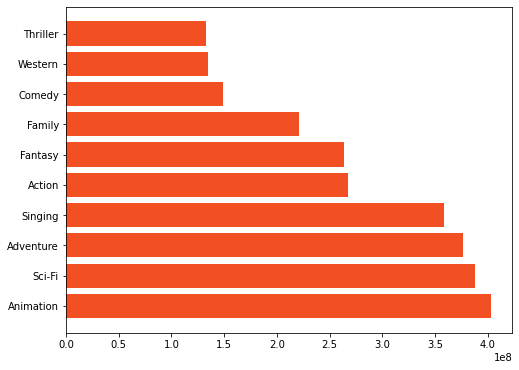

In [34]:
# plotting those values in a horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))

# horizontal bar chart
ax.barh(y=ww_top_10['genre'], width=ww_top_10['worldwide_gross_final']);

In [35]:
# Plotting it with seaborn

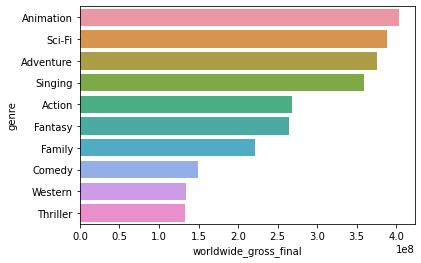

In [36]:
sns.barplot(data=ww_top_10, y='genre', x='worldwide_gross_final', orient='h');

### Next is profitability

In [37]:
profit_top_10 = genre_numbers[['genre', 'profitability']].nlargest(10,'profitability')
profit_top_10

,genre,profitability
2,Animation,301438654.41
16,Singing,285932739.88
15,Sci-Fi,285190263.04
1,Adventure,264842752.34
0,Action,181932136.54
9,Fantasy,173309482.47
8,Family,147034344.77
4,Comedy,104490843.36
18,Thriller,96286351.90
10,History,76823033.96


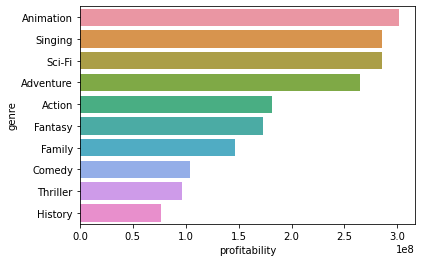

In [38]:
# Plotting a horizontal bar chart
sns.barplot(data=profit_top_10, y='genre', x='profitability', orient='h');

### Next Plotting Return on Investment

In [39]:
roi_top_10 = genre_numbers[['genre', 'roi_%']].nlargest(10,'roi_%')
roi_top_10

,genre,roi_%
16,Singing,3.92
12,Music,3.76
6,Documentary,3.43
2,Animation,2.96
11,Horror,2.94
13,Mystery,2.80
15,Sci-Fi,2.78
18,Thriller,2.63
14,Romance,2.43
1,Adventure,2.38


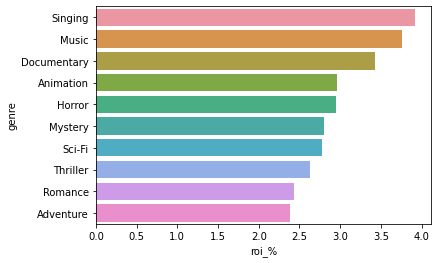

In [40]:
# Plotting on a horizontal bar chart
sns.barplot(data=roi_top_10, y='genre', x='roi_%', orient='h');

In [41]:
# this will show the number of observations for each genre
genre_numbers_count = df_all_filtered.groupby('genre').count().reset_index()
genre_numbers_count.sort_values('movie_id', ascending=False)

,genre,movie_id,budget_final,domestic_gross,worldwide_gross_final,profitability
7,Drama,572,572,572,572,572
4,Comedy,452,452,452,452,452
0,Action,381,381,381,381,381
1,Adventure,315,315,315,315,315
18,Thriller,209,209,209,209,209
5,Crime,191,191,191,191,191
14,Romance,162,162,162,162,162
11,Horror,130,130,130,130,130
15,Sci-Fi,113,113,113,113,113
9,Fantasy,111,111,111,111,111


NOTE: A sample size of less than 30 may be too small for significant results. I'll create a new dataframe without genres with less than 30 observations

I'll get a list of the genres with less than 30 observations and then remove them from the df_all_filtered dataframe. From there I'll group the dataframe again and find the mean of each genre.

In [42]:
small_genres = genre_numbers_count.loc[genre_numbers_count['movie_id'] < 30]['genre'].values

In [43]:
# make the small_genres array a list
small_genres = list(small_genres)
small_genres

['Documentary', 'History', 'Singing', 'Sport', 'War', 'Western']

In [44]:
'Documentary' in small_genres

True

In [45]:
df_all_filtered

,movie_id,genre,budget_final,domestic_gross,worldwide_gross_final,profitability
0,tt0249516,Action,65000000.00,0,73706.00,-64926294.00
1,tt0249516,Animation,65000000.00,0,73706.00,-64926294.00
2,tt0249516,Comedy,65000000.00,0,73706.00,-64926294.00
3,tt0359950,Adventure,90000000.00,58236838,188133322.00,98133322.00
4,tt0359950,Comedy,90000000.00,58236838,188133322.00,98133322.00
...,...,...,...,...,...,...
3308,tt7784604,Mystery,10000000.00,44069456,80239658.00,70239658.00
3309,tt7959026,Crime,50000000.00,103804407,174804407.00,124804407.00
3310,tt7959026,Drama,50000000.00,103804407,174804407.00,124804407.00
3311,tt7959026,Thriller,50000000.00,103804407,174804407.00,124804407.00


In [46]:
# I'll filter the df_all_filtered dataset without the small_genres
df_all_most_genres = df_all_filtered.loc[~(df_all_filtered['genre'].isin(small_genres))]

In [47]:
# Now to find mean of the genres in new dataframe
most_genres = df_all_most_genres.groupby('genre').mean().reset_index()

In [48]:
# add roi_% column to new dataframe
most_genres['roi_%'] = (most_genres['profitability'] / most_genres['budget_final'])

In [49]:
most_genres

,genre,budget_final,domestic_gross,worldwide_gross_final,profitability,roi_%
0,Action,85857217.86,98583883.77,267789354.40,181932136.54,2.12
1,Adventure,111359365.09,134049026.22,376202117.43,264842752.34,2.38
2,Animation,101782608.70,147567057.25,403221263.11,301438654.41,2.96
3,Biography,28255905.71,47558662.94,95339849.15,67083943.44,2.37
4,Comedy,44362157.58,66533610.71,148853000.94,104490843.36,2.36
5,Crime,35279359.61,43382116.07,92288669.69,57009310.08,1.62
6,Drama,29713567.94,40308823.51,86434153.23,56720585.30,1.91
7,Family,74175324.68,90405208.36,221209669.44,147034344.77,1.98
8,Fantasy,90816222.07,91436305.47,264125704.54,173309482.47,1.91
9,Horror,21265274.23,38370353.99,83872439.85,62607165.62,2.94


### Redo Visualizing Worldwide Gross

In [50]:
new_worldwide_gross = most_genres[['genre', 'worldwide_gross_final']].nlargest(10, columns='worldwide_gross_final')
new_worldwide_gross

,genre,worldwide_gross_final
2,Animation,403221263.11
13,Sci-Fi,387790263.06
1,Adventure,376202117.43
0,Action,267789354.40
8,Fantasy,264125704.54
7,Family,221209669.44
4,Comedy,148853000.94
14,Thriller,132880251.42
11,Mystery,102412699.58
3,Biography,95339849.15


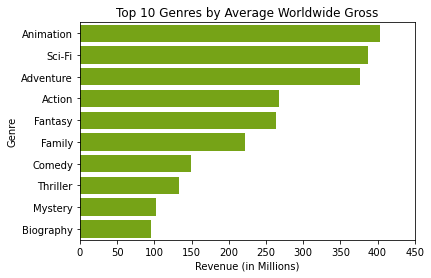

In [51]:
# plotting on a horizontal bar
plot = sns.barplot(data=new_worldwide_gross, y='genre', x='worldwide_gross_final', orient='h', color='#7FBA00');

# title and axis labels
plot.set_title("Top 10 Genres by Average Worldwide Gross")
plot.set_xlabel("Revenue (in Millions)")
plot.set_ylabel("Genre")

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
x_tick_labels = ['{:,.0f}'.format(x) for x in plot.get_xticks()/1000000]
plot.set_xticks(plot.get_xticks().tolist())
plot.set_xticklabels(x_tick_labels);

# save plot as jpg
plt.savefig('../Images/Top 10 Genres by Worldwide Gross.jpg', dpi=400, bbox_inches='tight')

### Redo Visualization for Profitability

In [52]:
profit_top_10 = most_genres[['genre', 'profitability']].nlargest(10,'profitability')
profit_top_10

,genre,profitability
2,Animation,301438654.41
13,Sci-Fi,285190263.04
1,Adventure,264842752.34
0,Action,181932136.54
8,Fantasy,173309482.47
7,Family,147034344.77
4,Comedy,104490843.36
14,Thriller,96286351.90
11,Mystery,75483784.49
10,Music,68689871.22


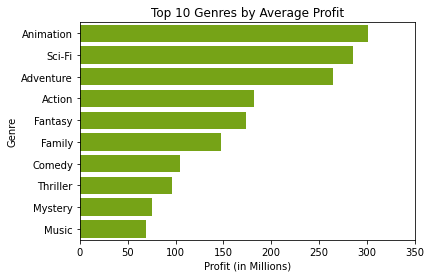

In [53]:
# Plotting a horizontal bar chart
plot = sns.barplot(data=profit_top_10, y='genre', x='profitability', orient='h', color='#7FBA00');

# title and axis labels
plot.set_title("Top 10 Genres by Average Profit")
plot.set_xlabel("Profit (in Millions)")
plot.set_ylabel("Genre")

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
x_tick_labels = ['{:,.0f}'.format(x) for x in plot.get_xticks()/1000000]
plot.set_xticks(plot.get_xticks().tolist())
plot.set_xticklabels(x_tick_labels);

# save plot as jpg
plt.savefig('../Images/Top 10 Genres by Average Profit.jpg', dpi=400, bbox_inches='tight')

### Redo Visualization for ROI

In [54]:
roi_top_10 = most_genres[['genre', 'roi_%']].nlargest(10,'roi_%')
roi_top_10

,genre,roi_%
10,Music,3.76
2,Animation,2.96
9,Horror,2.94
11,Mystery,2.80
13,Sci-Fi,2.78
14,Thriller,2.63
12,Romance,2.43
1,Adventure,2.38
3,Biography,2.37
4,Comedy,2.36


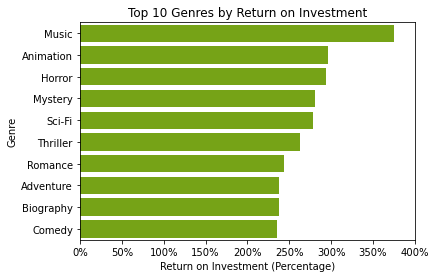

In [55]:
# Plotting on a horizontal bar chart
plot = sns.barplot(data=roi_top_10, y='genre', x='roi_%', orient='h', color='#7FBA00');

# title and axis labels
plot.set_title("Top 10 Genres by Return on Investment")
plot.set_xlabel("Return on Investment (Percentage)")
plot.set_ylabel("Genre")

# This changes the tick labels to show in millions (ex. 50,000,000 -> 50) 
x_tick_labels = ['{:,.0f}'.format(x) + '%' for x in plot.get_xticks()*100]
plot.set_xticks(plot.get_xticks().tolist())
plot.set_xticklabels(x_tick_labels);

# save plot as jpg
plt.savefig("../Images/Top 10 Genres by Return on Investment.jpg", dpi=400, bbox_inches='tight')

### Visualizing a Cat Plot with Top 10 Genres that have over 30 observations

In [56]:
df_all_most_genres

,movie_id,genre,budget_final,domestic_gross,worldwide_gross_final,profitability
0,tt0249516,Action,65000000.00,0,73706.00,-64926294.00
1,tt0249516,Animation,65000000.00,0,73706.00,-64926294.00
2,tt0249516,Comedy,65000000.00,0,73706.00,-64926294.00
3,tt0359950,Adventure,90000000.00,58236838,188133322.00,98133322.00
4,tt0359950,Comedy,90000000.00,58236838,188133322.00,98133322.00
...,...,...,...,...,...,...
3307,tt7784604,Horror,10000000.00,44069456,80239658.00,70239658.00
3308,tt7784604,Mystery,10000000.00,44069456,80239658.00,70239658.00
3309,tt7959026,Crime,50000000.00,103804407,174804407.00,124804407.00
3310,tt7959026,Drama,50000000.00,103804407,174804407.00,124804407.00


In [57]:
# I'll grab list of top 10 genres by worldwide gross
ww_top_10_genres = list(ww_top_10['genre'])
ww_top_10_genres

['Animation',
 'Sci-Fi',
 'Adventure',
 'Singing',
 'Action',
 'Fantasy',
 'Family',
 'Comedy',
 'Western',
 'Thriller']

In [58]:
# now I'll filter data frame by only these genres
df_all_most_genres.loc[df_all_most_genres['genre'].isin(ww_top_10_genres)]

,movie_id,genre,budget_final,domestic_gross,worldwide_gross_final,profitability
0,tt0249516,Action,65000000.00,0,73706.00,-64926294.00
1,tt0249516,Animation,65000000.00,0,73706.00,-64926294.00
2,tt0249516,Comedy,65000000.00,0,73706.00,-64926294.00
3,tt0359950,Adventure,90000000.00,58236838,188133322.00,98133322.00
4,tt0359950,Comedy,90000000.00,58236838,188133322.00,98133322.00
...,...,...,...,...,...,...
3300,tt7424200,Animation,10000000.00,29790236,28646544.00,18646544.00
3301,tt7424200,Comedy,10000000.00,29790236,28646544.00,18646544.00
3303,tt7690670,Action,16000000.00,20537137,20545116.00,4545116.00
3305,tt7690670,Thriller,16000000.00,20537137,20545116.00,4545116.00


In [59]:
df_all_most_genres.loc[df_all_most_genres['worldwide_gross_final'] == 0]

,movie_id,genre,budget_final,domestic_gross,worldwide_gross_final,profitability


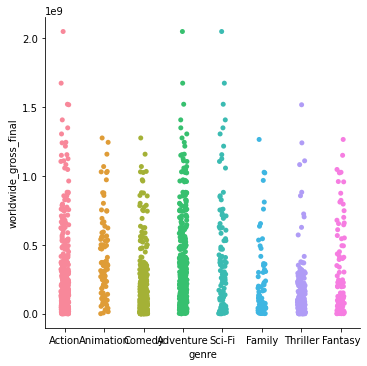

In [60]:
# Cat plot of top 10 genres by average worldwide gross
# save data frame to variable
data = df_all_most_genres.loc[df_all_most_genres['genre'].isin(ww_top_10_genres)]

# Cat plot
plot = sns.catplot(data=data, x='genre', y='worldwide_gross_final')


It is a great visual of the distribution of the values for the genres, but it does not look like it will be a valuable visual for our presentation based on our audience